# Criando uma apresentação executiva
- Vamos usar a base de vendas do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


### 1. Importando e visualizando a base
- Base: "Criando uma apresentação executiva.csv"

In [125]:
# Importando as bibliotecas e a base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base = pd.read_csv("Criando uma apresentação executiva.csv")

### 2. Entendendo e tratando a base

In [126]:
# Visualizando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor**

In [127]:
# Verificando os registros com Postal Code vazio
base[base["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?**

In [128]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code
base[(base["City"]=="Burlington") & (base["State"]=="Vermont")]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Podemos ir diretamente no google para buscar essa informação**

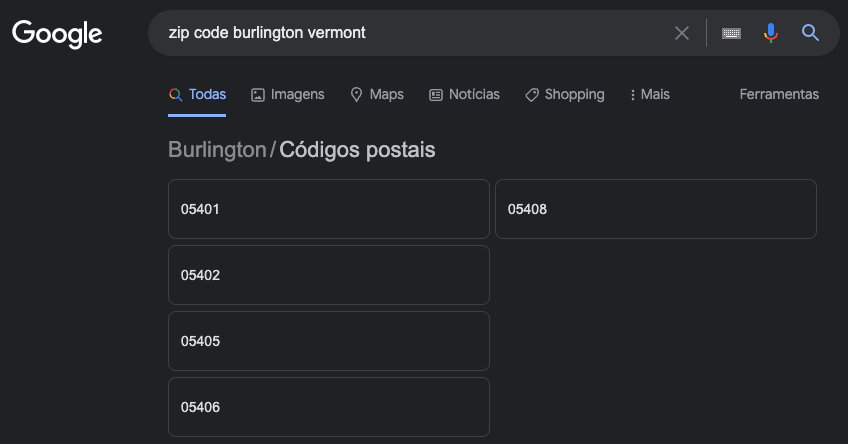

In [129]:
# Atualizando essa informação
base.loc[(base["City"]=="Burlington") & (base["State"]=="Vermont"),"Postal Code"]=5401

In [130]:
# Verificando se ainda existe algum valor nulo
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [131]:
# Visualizando novamente as informações da base
base.loc[(base["City"]=="Burlington") & (base["State"]=="Vermont") & (base["Postal Code"].isnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [132]:
# Se precisar dropar alguma coluna é só usar
base2=base.drop("Postal Code",axis=1)

### 3. <font color="blue"> Como foi a venda nesse período? </font>
Aqui temos 2 questões que precisamos pensar:
- **Quais <font color="blue">colunas</font> vamos usar?**
    - Podemos verificar a venda na coluna "Sales""
    - O período nós podemos usar a coluna "Order Date", mas precisamos entender melhor essa coluna
- **Qual o <font color="blue">período</font> queremos exibir?**

In [133]:
# Para entender a data, podemos ver de qual período estamos falando
base["Order Date"]

0       08/11/2017
1       08/11/2017
2       12/06/2017
3       11/10/2016
4       11/10/2016
           ...    
9795    21/05/2017
9796    12/01/2016
9797    12/01/2016
9798    12/01/2016
9799    12/01/2016
Name: Order Date, Length: 9800, dtype: object

**<font color="red">CUIDADO:</font> Se a coluna de data estiver como texto e não como data, a ordenação vai ser pelo texto e não pela data!**

**Podemos converter uma coluna para data usando o to_datetime do pandas**
<br><br>
base["coluna"] = pd.**to_datetime(**base["coluna"]**)**
- No datetime, caso tenha apenas a data, a hora ficaria como 00:00:00
- Se quisermos considerar apenas a data, podemos usar o **.date** da biblioteca **datetime**

In [134]:
import datetime as dt

In [135]:
# Convertendo as colunas de data para datetime
base["Order Date"] = pd.to_datetime(base["Order Date"])
base["Ship Date"] = pd.to_datetime(base["Ship Date"])

C:\Users\rault\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rault\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rault\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\rault\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

In [136]:
# Para entender a data, podemos ver de qual período estamos falando
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [137]:
# Buscando o máximo da data
base["Order Date"].max()

Timestamp('2018-12-30 00:00:00')

- Estamos falando de 4 anos de análise, começando em jan/2015 e indo até dez/2018

#### Como estamos falando de um período grande de anos, podemos começar a visualização pelos anos
- Para isso, podemos usar o **.year** da biblioteca datetime para criar uma nova coluna apenas com o ano dessa base

# Venda por ano

In [138]:
# Criando uma coluna com o ano
base["Ano"] = base["Order Date"].dt.year

#### Lembram do groupby()?

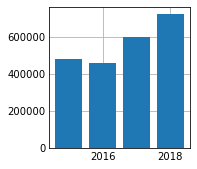

In [139]:
# Usando essa coluna no group by e criando um plot de barras
import matplotlib.pyplot as plt

# criando os eixos X e Y
x=base.groupby("Ano")["Sales"].sum().index
y=base.groupby("Ano")["Sales"].sum().values

# plot
fig, ax = plt.subplots()

# criando os gráficos
ax.bar(x,y)

# mandando plotar
plt.show()

## Melhorando o visual desse gráfico
- Como já vimos no último tópico, podemos melhorar muito a visualização desse gráfico. Vamos fazer isso!
- Primeiramente vamos traçar um gráfico usando o que aprendemos de matplotlib
    - https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py
    - Sugestão de cor: `#84ba5b`

In [140]:
import matplotlib.pyplot as plt

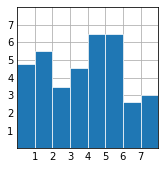

In [141]:
# Criando um gráfico com o matplotlib usando o groupby
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

**Adicionando o título e melhorando os textos do eixo**
- Vamos adicionar o título e melhorar o eixo x
    - O `.set_title` vai permitir colocar título e ajustar os parâmetros desse títulos
        - fontsize: Tamanho da fonte
        - fontweight: Espessura da fonte
        - color: Cor da fonte
    - O `xaxis.set_ticks` vai definir os valores mostrados no eixo x
    - O `.tick_params(axis='x')` vai ajustar o parâmetro do eixo x
        - labelsize: tamanho do label

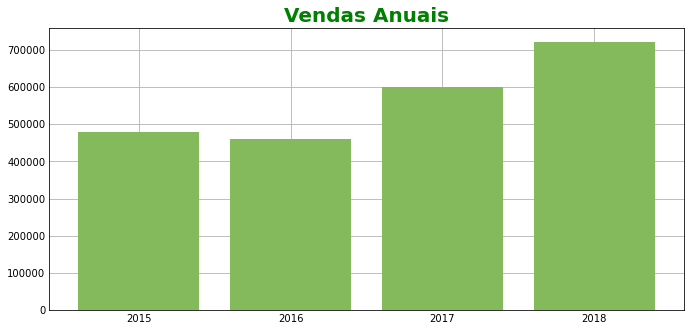

In [142]:
# plot
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

# Valores para o gráfico
soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

# Criando gráfico
ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

# Colocando o eixo X
ax.xaxis.set_ticks(soma_ano.index)

# Colocando título no gráfico
ax.set_title("Vendas Anuais", fontsize=20, color="green", fontweight="bold")

# Mandando plotar
plt.show()

**Adicionando o rótulo de dados**
- Para adicionar rótulo de dados, vamos usar o `.annotate` como vimos na última aula

In [143]:
import numpy as np

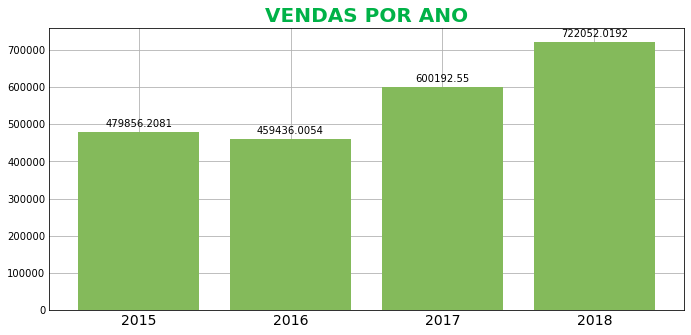

In [144]:
# Plot
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

# Criando os valores do gráfico
soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

# Criando o gráfico
ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

# Colocando o rótudo de dados
for i in range(0,len(soma_ano)):
    ax.annotate(soma_ano.values[i],(soma_ano.index[i],soma_ano.values[i]),ha="center",xytext=(0,5),textcoords="offset points")

# Ajustando título do gráfico
ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

# Ajustando eixo X
ax.xaxis.set_ticks(soma_ano.index) # Ajustando os valores de X
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo X

# Mandando plotar
plt.show()

**Melhorando a visualização do gráfico**
- Para o eixo y, podemos fazer igual fizemos para o eixo x
    - Com o `.set_yticks` vamos ajustar os valores do eixo y
    - O `.yaxis.set_visible(False)` permite retirar os valores do eixo y, tornando nosso visual mais claro
- Já para retirar as bordas do gráfico, basta usar o `.spines['top'].set_visible(False)`

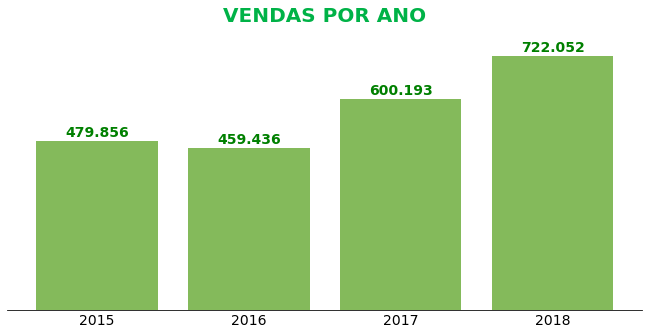

In [145]:
# plot
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

# Gerando números do gráfico
soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

# Criando o gráfico
ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

# Setando o título do gráfico
ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

# Ajustando o eixo X
ax.xaxis.set_ticks(soma_ano.index) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )

# Arrumando o eixo Y
ax.set_yticks([0,800000]) # Ajustando início e o fim de eixo Y
ax.yaxis.set_visible(False) # Removendo os valores do eixo Y

# Tirando a linha de grade do eixo X
ax.grid(visible=None)

# Tirando as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mandando plotar o gráfico
plt.show()

**Como resultado final, teremos o gráfico abaixo**

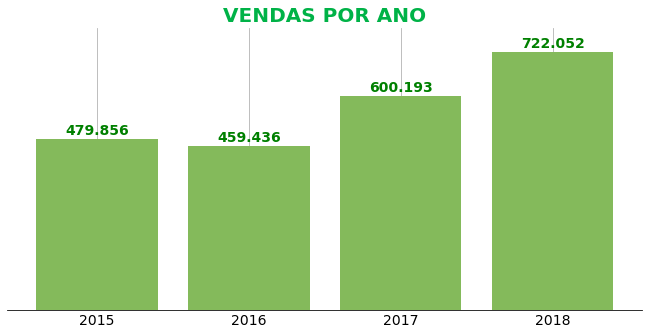

In [146]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )
    
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Venda por mês

#### Também podemos mostrar essa visão por meses
- Para isso, podemos usar o **.month** da biblioteca datetime para criar uma nova coluna apenas com o mês dessa base

In [147]:
base.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


In [148]:
# Criando uma coluna com o mês
base["Mes"]=base["Order Date"].dt.month
base["Anomes"]=(base["Ano"]*100)+base["Order Date"].dt.month

In [149]:
# Fazendo o groupby agora por mês e ano
soma_mes = base.groupby(["Mes","Ano"])["Sales"].sum()

In [150]:
# Verificando os valores gerados
soma_mes.head()

Mes  Ano 
1    2015    28828.2540
     2016    29347.3864
     2017    38048.1840
     2018    59767.0910
2    2015    12588.4840
Name: Sales, dtype: float64

**Com o <font color="blue">.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**

In [151]:
# Vamos transformar os índices em colunas
soma_mes = soma_mes.reset_index()

In [152]:
# Visualizando a base novamente
soma_mes

,Mes,Ano,Sales
0,1,2015,28828.2540
1,1,2016,29347.3864
2,1,2017,38048.1840
3,1,2018,59767.0910
4,2,2015,12588.4840
5,2,2016,20728.3520
6,2,2017,48907.5900
7,2,2018,48928.8334
8,3,2015,54027.6920
9,3,2016,34489.6776


**Vamos usar o gráfico que fizemos na aula anterior para ir criando esse gráfico**

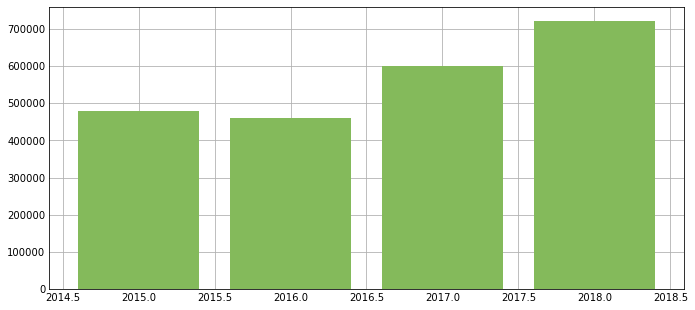

In [153]:
# Criando o gráfico de mês com o matplotlib
# plot
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

# criando o gráfico
ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

# mandando plotar
plt.show()

**Agora vamos adicionar a barra do ano de 2016**
- Vamos adicionar um gráfico de barras com os dados de 2016

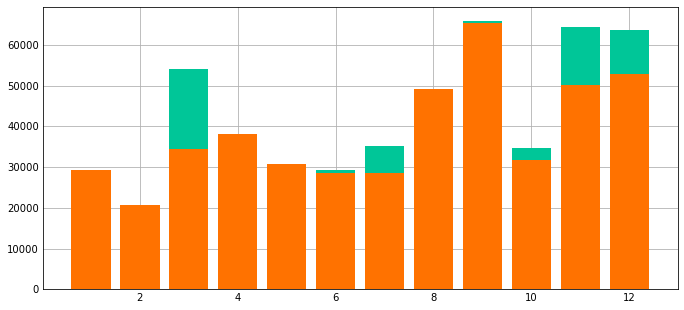

In [154]:
# plot
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

# criando gráfico
ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values,soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015 # Label dos dados
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values,soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#FF7200", # Cor das barras
       label=2016 # Label dos dados
      )

# mandando plotar
plt.show()

**E então, deslocar as barras**
- Para isso, vamos usar o mesmo raciocínio do width que usamos na aula anterior
    - Para diferenciar os dados, também podemos usar o `label` para informar qual é cada um dos gráficos

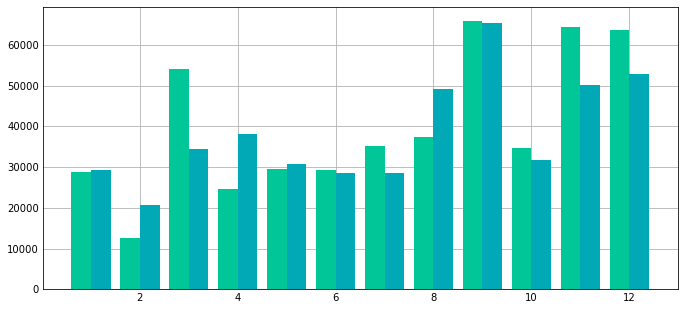

In [155]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

# largura da barra
w=0.4

# criando gráfico
ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-w/2,
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698",
       width=w
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values+w/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5",
       width=w
      )

# mandando plotar
plt.show()

**Podemos agora adicionar todas as barras**

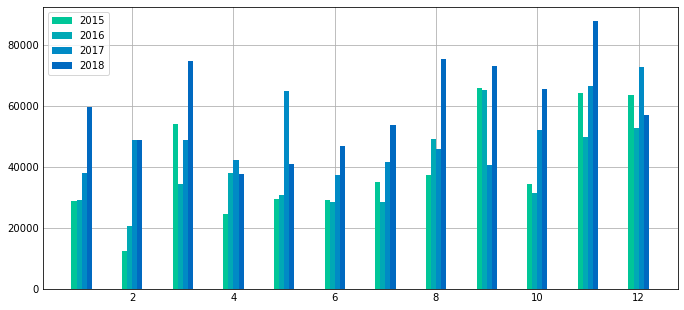

In [156]:
# plot
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

### VAMOS AJUSTAR ESSA PARTE DO CÓDIGO ADICIONANDO AS PARTES DO TAMANHO DAS BARRAS
wid = 0.1

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # <- DESLOCANDO A BARRA PARA A ESQUERDA
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, # <- DESLOCANDO A BARRA PARA A DIREITA
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )

# colocando legenda
ax.legend()

# mandando plotar
plt.show()

**E vamos colocar rótulo apenas em 2018 para não poluir muito o gráfico**

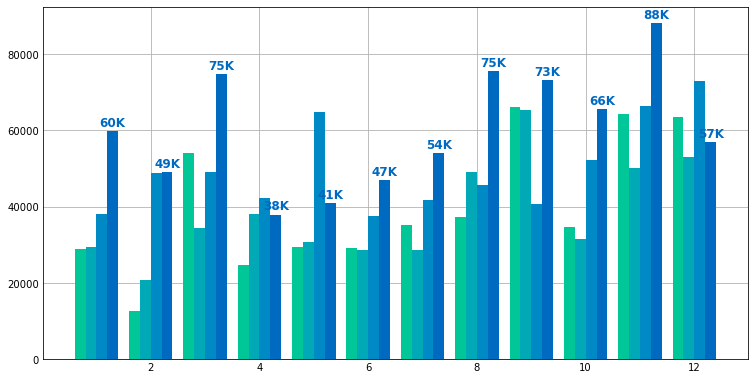

In [157]:
fig,ax = plt.subplots(
            figsize = (10,5) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )

for i in range(0,12):
    ax.annotate('{:,.0f}K'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
                                 )
plt.show()

**Melhorando o visual retirando as bordas e ajustando o texto do eixo x**

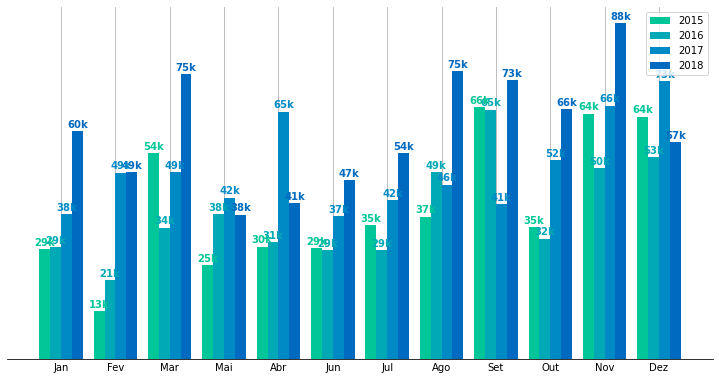

In [257]:
fig,ax = plt.subplots(
            figsize = (10,5) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

# criando o grafico
ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )

# colocando a legenda
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2017].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2017].Mes.values[i]+wid/2,soma_mes[soma_mes.Ano == 2017].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#008ac5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2016].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2016].Mes.values[i]-wid/2,soma_mes[soma_mes.Ano == 2016].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00a9b5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2015].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2015].Mes.values[i]-wid-wid/2,soma_mes[soma_mes.Ano == 2015].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
            )

# tirando as bordas
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Retirando os valores do eixo y
ax.yaxis.set_visible(False)

# Ajustando o eixo X
ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Mai','Abr','Jun','Jul','Ago','Set','Out','Nov','Dez'])

# mandando plotar
plt.show()

**Como resultado final, teremos o gráfico abaixo**

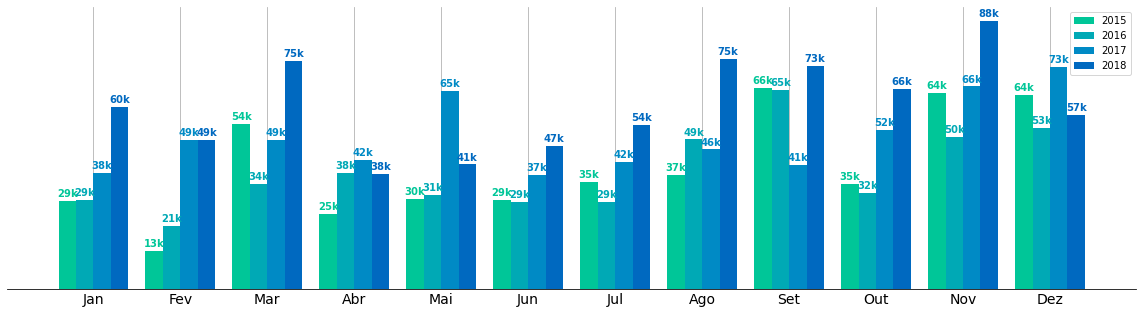

In [256]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2017].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2017].Mes.values[i]+wid/2,soma_mes[soma_mes.Ano == 2017].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#008ac5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2016].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2016].Mes.values[i]-wid/2,soma_mes[soma_mes.Ano == 2016].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00a9b5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2015].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2015].Mes.values[i]-wid-wid/2,soma_mes[soma_mes.Ano == 2015].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
            )
    
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando as bordas do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x
    
plt.show()

### 4. <font color="blue"> Qual foi a categoria mais vendida? </font>
Precisamos primeiro entender a informação de categoria

In [160]:
# Podemos fazer um groupby da categoria
base.groupby("Category")["Sales"].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

**Como estamos falando de 4 anos diferentes, seria interessante entender como foram essas categorias em cada um dos anos**

In [161]:
# Agrupando por ano e categoria
categoria = base.groupby(["Category","Ano"])["Sales"].sum()

**Uma forma de visualizar melhor essas informações é fazer um gráfico de barras com esses dados, bem semelhante ao que fizemos acima**

In [162]:
# Criando agora a base de categorias como fizemos anteriormente
categoria = base.groupby(["Category","Ano"])["Sales"].sum()
categoria = categoria.reset_index()

In [163]:
# Visualizando 
categoria

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


**Utilizando a mesma lógica do gráfico anterior**

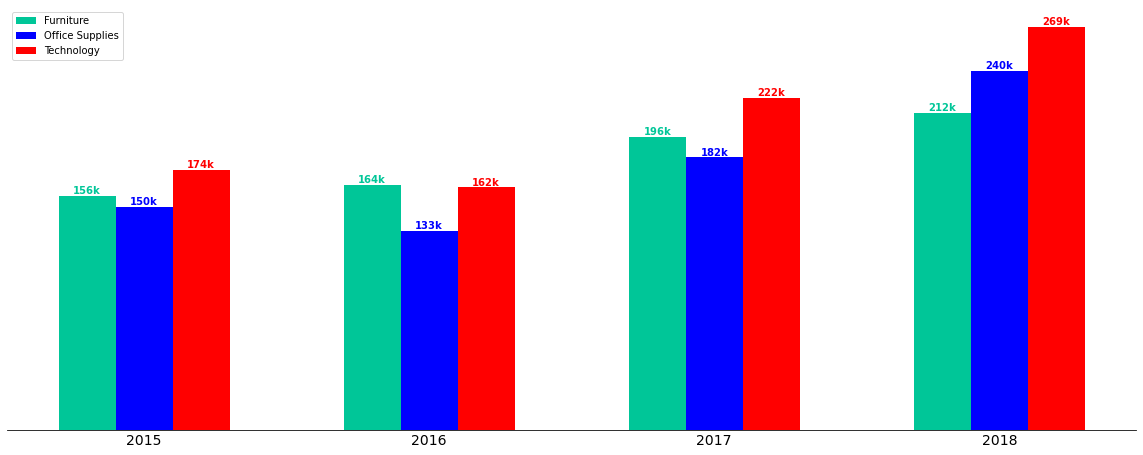

In [164]:
# Vamos utilizar o mesmo código do gráfico anterior para exibir por categorias
fig,ax = plt.subplots(
            figsize = (16,6) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(categoria[categoria.Category=='Furniture'].Ano.values-wid, # Ajuste da posição das barras
       categoria[categoria.Category=='Furniture'].Sales.values,
       color="#00c698", # Cor das barras
       label='Furniture', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(categoria[categoria.Category=='Office Supplies'].Ano.values, # Ajuste da posição das barras
       categoria[categoria.Category=='Office Supplies'].Sales.values,
       color="blue", # Cor das barras
       label='Office Supplies', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(categoria[categoria.Category=='Technology'].Ano.values+wid, # Ajuste da posição das barras
       categoria[categoria.Category=='Technology'].Sales.values,
       color="red", # Cor das barras
       label='Technology', # Label dos dados
       width=wid # Largura das barras
      )

# Adicionando o rótulo dos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category=='Furniture'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category=='Furniture'].Ano.values[i]-wid,categoria[categoria.Category=='Furniture'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category=='Office Supplies'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category=='Office Supplies'].Ano.values[i],categoria[categoria.Category=='Office Supplies'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="blue" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category=='Technology'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category=='Technology'].Ano.values[i]+wid,categoria[categoria.Category=='Technology'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="red" # Cor dos rótulos
            )

# Retirando os valores do eixo y
ax.yaxis.set_visible(False)

# Melhorando eixo X
ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# Retirando as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tirando as linhas de grade
ax.grid(False)

ax.legend()
    
plt.show()

**Como resultado final, teremos o gráfico abaixo**

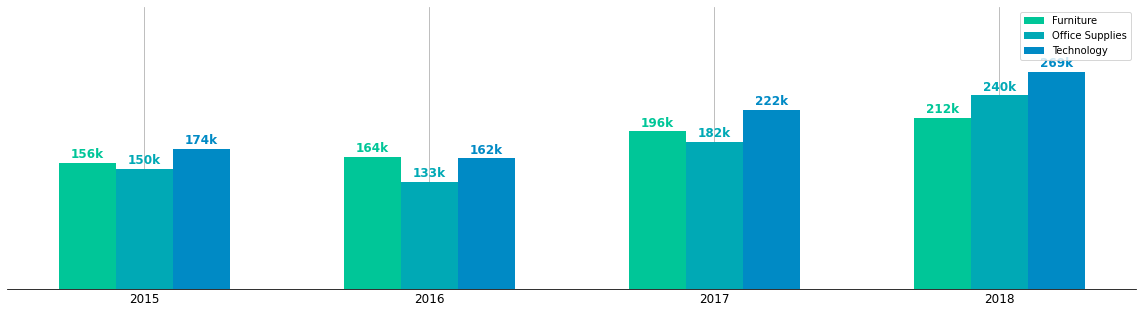

In [165]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

wid = 0.2 

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )

ax.legend()

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,categoria[categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,categoria[categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

### 4. <font color="blue"> Qual o item mais vendido? </font>
Vamos seguir exatamente a mesma lógica da categoria

**Podemos fazer a tabela considerando esses top itens**
- Para pegar uma base, podemos usar o `.head()` que já conhecemos
- Podemos também usar o `.sort_values()` para definirmos se a base será crescente ou descrescente

In [166]:
# Podemos fazer um groupby do item
item = base.groupby("Product Name")["Sales"].sum()
item = item.reset_index().sort_values("Sales", ascending=False)
item

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
...,...,...
97,Acme Serrated Blade Letter Opener,7.632
783,Grip Seal Envelopes,7.072
1792,Xerox 20,6.480
208,Avery 5,5.760


**Uma forma de resolver a quantidade de ítens seria fazer apenas para os top 10 ítens**

In [167]:
# Os top 10 itens são
top_10_itens=item.head(10)

In [179]:
# Definindo o top n itens
n = 10
top_n_itens=item.head(n)
top_n_itens

,Product Name,Sales,uniao
404,Canon imageCLASS 2200 Advanced Copier,61599.824,unir
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir
785,HON 5400 Series Task Chairs for Big and Tall,21870.576,unir
685,GBC DocuBind TL300 Electric Binding System,19823.479,unir
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,unir
804,Hewlett Packard LaserJet 3310 Copier,18839.686,unir
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,unir
682,GBC DocuBind P400 Electric Binding System,17965.068,unir
812,High Speed Automatic Electric Letter Opener,17030.312,unir


**Vamos traçar um gráfico de barras horizontais para mostrar o top 10 itens**
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
- Podemos usar o `ax.invert_yaxis()` para inverter o eixo y

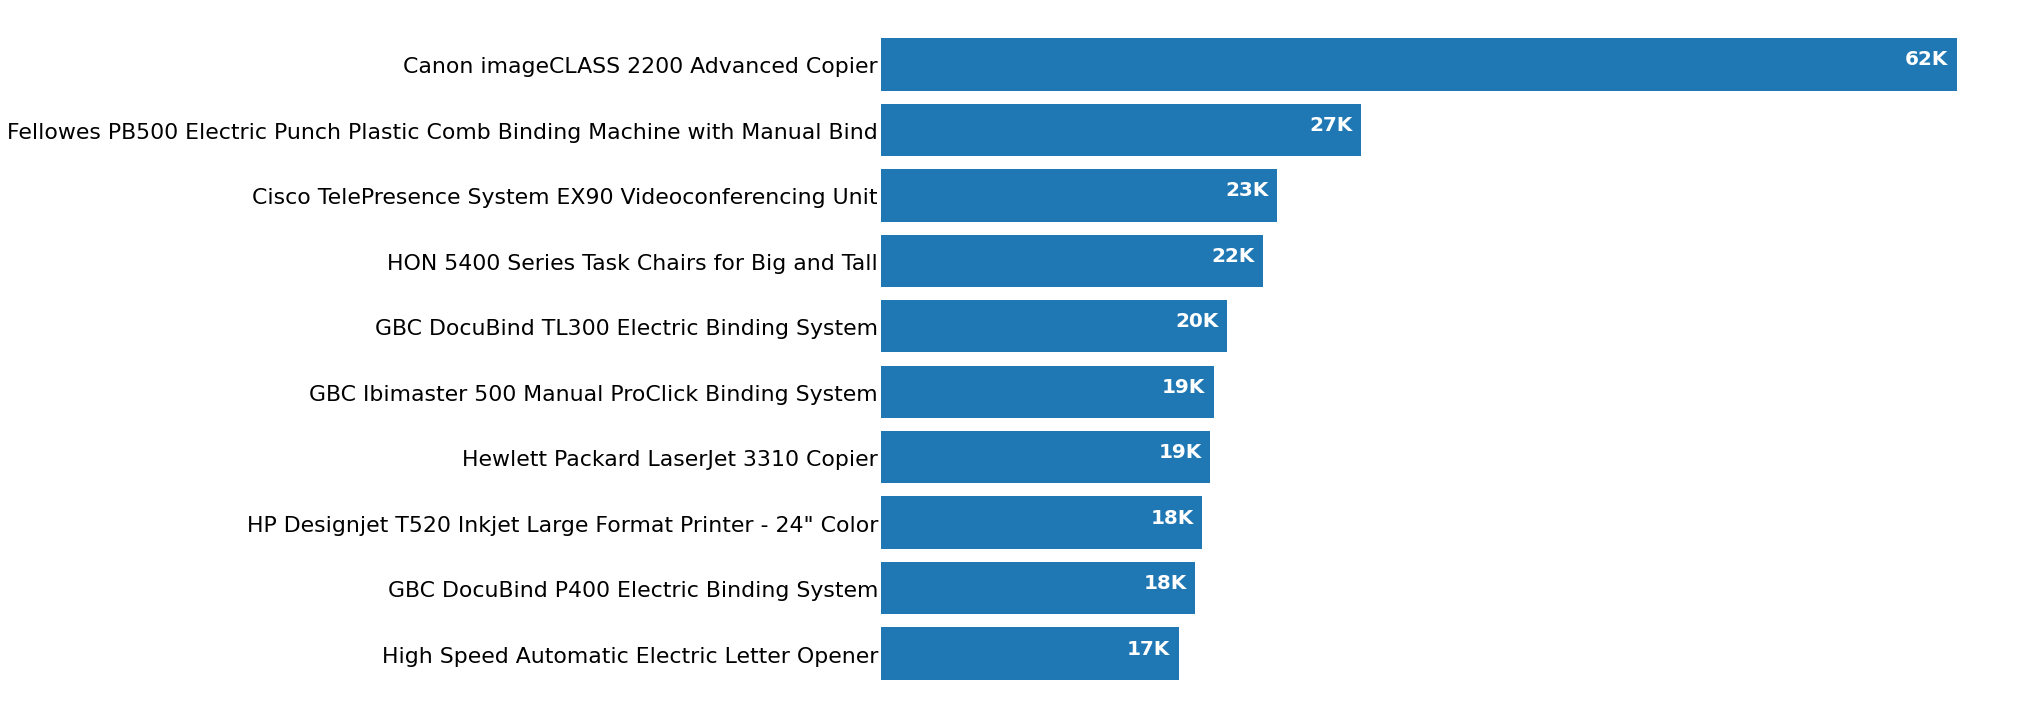

In [169]:
fig,ax = plt.subplots(
            figsize = (16,10)
        )

ax.barh(top_n_itens['Product Name'].values, # Definindo valor do eixo X, 
         top_n_itens['Sales'].values, # Definindo valor do eixo Y
         align='center'
        )

# Colocando rótulo de dados
for i in np.arange(0,n):
    ax.annotate('{:,.0f}K'.format(top_n_itens['Sales'].values[i]/1000), 
                (top_n_itens['Sales'].values[i],i), 
                ha="center", xytext=(-30,0), textcoords="offset points", 
                fontsize=20, fontweight='bold', color="white")

# Tirando os valores do eixo X
ax.xaxis.set_visible(False)

# Mudando tamanho da fonte do eixo Y
ax.tick_params(axis='y', labelsize=22)
    
# Colocando do maior pro menor
ax.invert_yaxis()

# tirando as bordas
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# tirando as linhas de grade
ax.grid(False)

plt.show()

**Agora agrupando por ítem e ano**

In [170]:
# Podemos fazer um groupby de item e ano
itens_ano = base.groupby(["Product Name","Ano"])["Sales"].sum()
itens_ano = itens_ano.reset_index().sort_values("Sales", ascending=False)
itens_ano

,Product Name,Ano,Sales
1164,Canon imageCLASS 2200 Advanced Copier,2018,35699.898
1163,Canon imageCLASS 2200 Advanced Copier,2017,25899.926
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.480
1855,Fellowes PB500 Electric Punch Plastic Comb Bin...,2016,15760.276
1974,GBC Ibimaster 500 Manual ProClick Binding System,2017,12860.562
...,...,...,...
4544,Universal Recycled Hanging Pressboard Report B...,2015,1.234
684,Avery Binder Labels,2015,1.167
170,Acco Economy Flexible Poly Round Ring Binder,2015,1.044
797,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",2016,0.984


In [171]:
# Para visualizar algum item dos top itens
itens_ano[itens_ano["Product Name"] == top_n_itens.iloc[2,0]]

,Product Name,Ano,Sales
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.48


**Como vamos criar esse gráfico? Como saber quais itens não aparecem em todos os anos?**

### Juntando bases no pandas

**O <font color='blue'>.merge()</font> irá juntar duas bases**
- Para isso, devemos passar:
    - base 1
    - base 2
    - how: forma que iremos fazer essa junção das bases
        - inner: o que tiver em comum entre as 2 bases (base 1 E base 2)
        - outer: tudo o que tiver nas 2 bases (base 1 OU base 2)
        - left: tudo o que tem na PRIMEIRA base, juntando com o que tiver na segunda
        - right: tudo o que tem na SEGUNDA base, juntando com o que tiver na primeira
    - on: colunar que vamos usar para fazer a junção da base

In [172]:
# Criando 2 dataframes
dic1 = {
    "nomes": ['Nome1','Nome2','Nome3'],
    "valores": [1,2,3]
}

base_dic1 = pd.DataFrame(dic1)

dic2 = {
    "nomes": ['Nome1','Nome2','Nome4'],
    "valores": [9,8,7]
}

base_dic2 = pd.DataFrame(dic2)

In [173]:
base_merge = pd.merge(
    base_dic1, # <- primeira base
    base_dic2, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="nomes" # <- coluna que vamos usar para fazer essa junção das bases
) 

display(base_merge)

,nomes,valores_x,valores_y
0,Nome1,1.0,9.0
1,Nome2,2.0,8.0
2,Nome3,3.0,NaN
3,Nome4,NaN,7.0


In [174]:
# Temos a nossa base de top itens
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Como podemos cruzar a base com todos os anos de 2015 a 2018?**
- Basta transformar as datas em um DataFrame e usar o merge para fazer essa união

In [175]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Ano']
df_datas

,Ano
0,2018
1,2017
2,2016
3,2015


**Só que pra conseguir unir as bases, precisamos ter uma coluna em comum entre elas**
- Então podemos, nas duas bases, criar uma coluna chamada `uniao` (ou qualquer outro nome) com o mesmo valor

In [178]:
item['uniao'] = 'unir'
df_datas['uniao'] = 'unir'

**Agora que temos uma coluna que conseguimos relacionar, podemos fazer o merge das bases**

In [183]:
produto_ano = pd.merge(
    top_n_itens, # <- primeira base
    df_datas, # <- segunda base
    how='inner', # <- tipo de junção que vamos fazer
    on="uniao" # <- coluna que vamos usar para fazer essa junção das bases
) 

display(produto_ano)

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2017
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2016
7,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2015
8,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir,2018
9,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir,2017


#### Agora podemos voltar para a base itens_ano e fazer a junção com essa base acima

In [184]:
display(itens_ano)

,Product Name,Ano,Sales
1164,Canon imageCLASS 2200 Advanced Copier,2018,35699.898
1163,Canon imageCLASS 2200 Advanced Copier,2017,25899.926
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.480
1855,Fellowes PB500 Electric Punch Plastic Comb Bin...,2016,15760.276
1974,GBC Ibimaster 500 Manual ProClick Binding System,2017,12860.562
...,...,...,...
4544,Universal Recycled Hanging Pressboard Report B...,2015,1.234
684,Avery Binder Labels,2015,1.167
170,Acco Economy Flexible Poly Round Ring Binder,2015,1.044
797,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",2016,0.984


In [185]:
itens_ano_grafico = pd.merge(
    produto_ano,
    itens_ano,
    how='left',
    on=['Product Name','Ano']
)
        
itens_ano_grafico.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


**Agora podemos usar esses dados para traçar o gráfico**

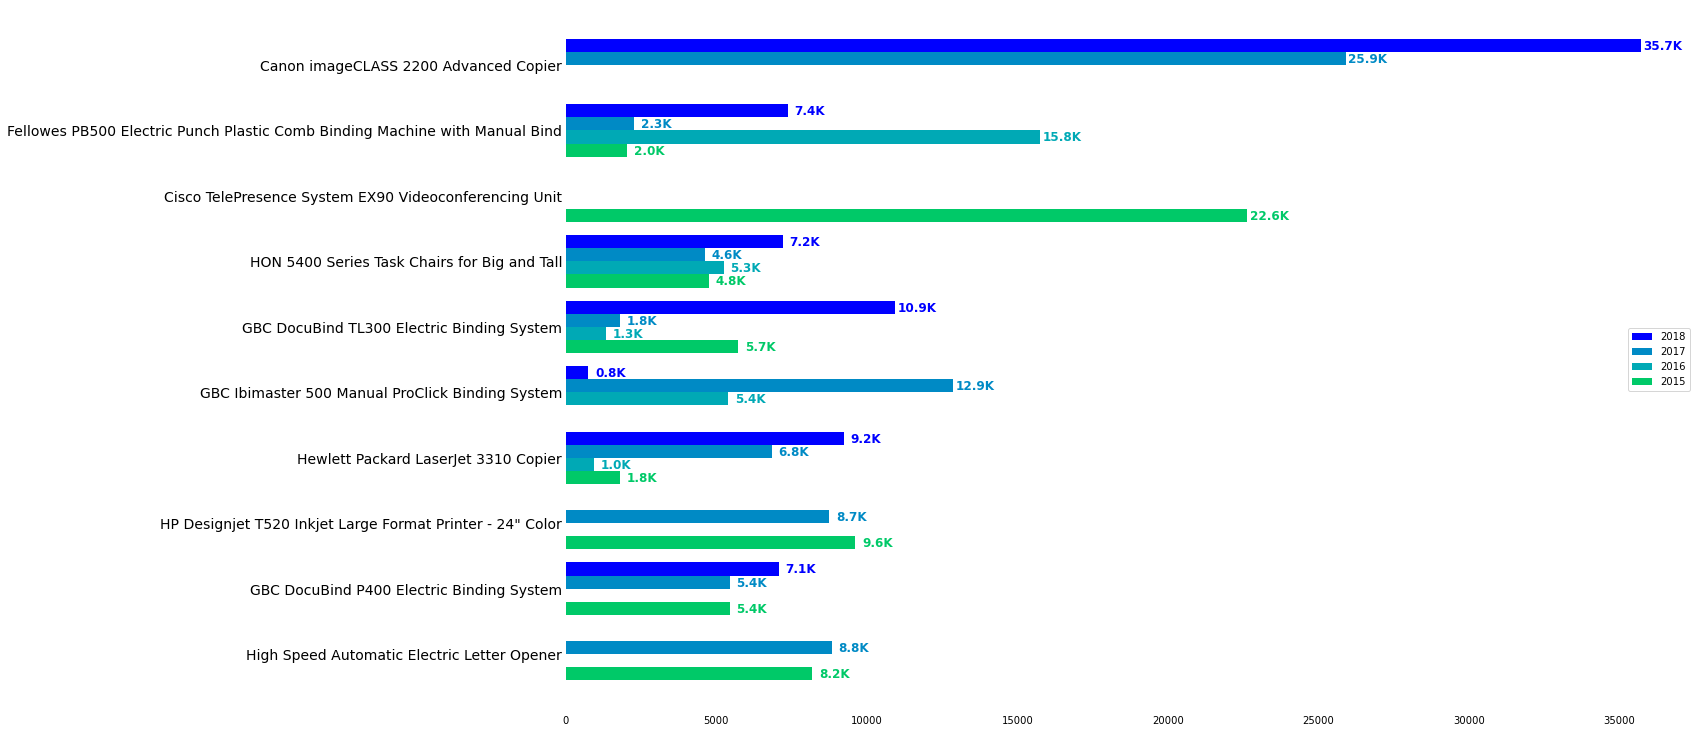

In [244]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,10)
        )

hg=0.2
qtde_itens=len(top_n_itens)

ax.barh(np.arange(0,qtde_itens)-hg/2-hg, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2018,
         color='blue'
        )
ax.barh(np.arange(0,qtde_itens)-hg/2, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2017,
         color='#008ac5'
        )
ax.barh(np.arange(0,qtde_itens)+hg/2, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2016,
         color='#00a9b5'
        )
ax.barh(np.arange(0,qtde_itens)+hg/2+hg, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2015,
         color='#00c968'
        )

# Colocando rótulo de dados
for i in np.arange(0,qtde_itens):
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values[i],i-hg/2-hg), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="blue")
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values[i],i-hg/2), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values[i],i+hg/2), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values[i],i+hg/2+hg), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c968")

# Colocando do maior pro menor
ax.invert_yaxis()

# ajustando eixo y
ax.yaxis.set_ticks(np.arange(0,qtde_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_n_itens['Product Name'])
ax.tick_params(axis='y',labelsize=14) # Melhorando o visual do eixo x

# tirando as bordas
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# tirando as linhas de grade
ax.grid(False)

# colocando a legenda
ax.legend()

# mandando plotar
plt.show()

**Como resultado final, teremos o gráfico abaixo**

In [ ]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,12)
        )

hgt = 0.2

qtd_itens = len(top_n_itens)

ax.barh(np.arange(0,qtd_itens)-hgt-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values, # Valores de x 
        align='center',
        height=hgt, # Comprimento do gráfico
        label=2018,
        color="#0069c0"
       )
ax.barh(np.arange(0,qtd_itens)-hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2017].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2017,color="#008ac5")
ax.barh(np.arange(0,qtd_itens)+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2016].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2016,color="#00a9b5")
ax.barh(np.arange(0,qtd_itens)+hgt+hgt/2, #Valores de y
        itens_ano_grafico[itens_ano_grafico.Ano == 2015].Sales_y.values, # Valores de x 
        align='center',height=hgt,label=2015,color="#00c698")

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

for i in np.arange(0,qtd_itens):
    ax.annotate('{:,.1f}k'.format(itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico.Ano == 2018].Sales_y.values[i],i-hgt-hgt/2), 
                ha="center", va="top", xytext=(20,6), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    
ax.yaxis.set_ticks(np.arange(0,qtd_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_n_itens["Product Name"]) # Colocando rótulo no meu eixo
ax.tick_params(axis='y',labelsize=10) # Melhorando o visual do eixo x

ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

# Resumindo as perguntas

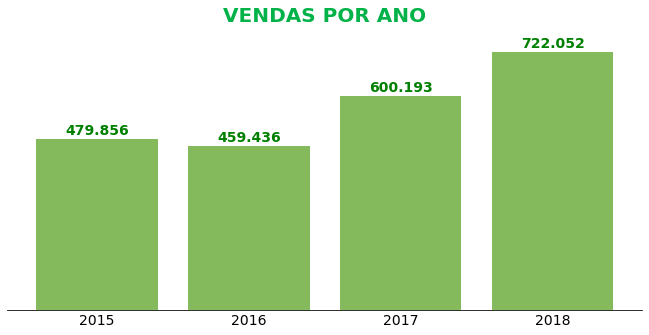

In [267]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

# criando valores para o gráfico
soma_ano = base.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

# criando o gráfico
ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

# ajustando titulo do gráfico
ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

# colocando rótulo de dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )

# ajustando eixo x
ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x    

# ajustando eixo y
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

# tirando as bordas do grafico
ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# tirando as linhas de grade
ax.grid(False)

# mandando plotar
plt.savefig('Vendas por Ano', transparent=True)

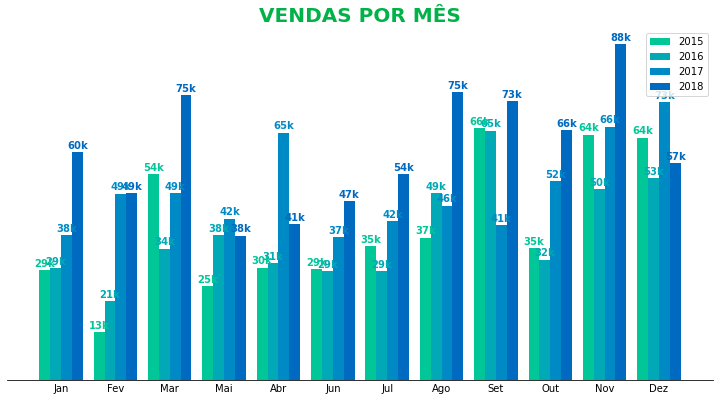

In [268]:
fig,ax = plt.subplots(
            figsize = (10,5) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

# criando o grafico
ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )

# colocando a legenda
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2017].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2017].Mes.values[i]+wid/2,soma_mes[soma_mes.Ano == 2017].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#008ac5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2016].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2016].Mes.values[i]-wid/2,soma_mes[soma_mes.Ano == 2016].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00a9b5" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2015].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2015].Mes.values[i]-wid-wid/2,soma_mes[soma_mes.Ano == 2015].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
            )

# colocando título do gráfico
ax.set_title("VENDAS POR MÊS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

# tirando as bordas
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Retirando os valores do eixo y
ax.yaxis.set_visible(False)

# Ajustando o eixo X
ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Mai','Abr','Jun','Jul','Ago','Set','Out','Nov','Dez'])

# tirando as linhas de grade
ax.grid(False)

# mandando plotar
plt.savefig('Vendas por Mês', transparent=True)

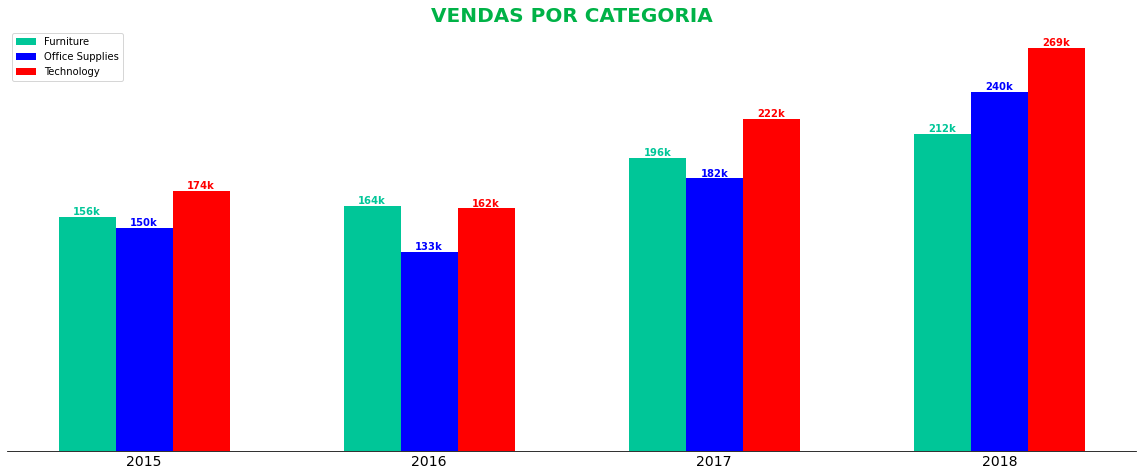

In [269]:
fig,ax = plt.subplots(
            figsize = (16,6) # Tamanho da figura
        )

wid = 0.2 # Tamanho das barras

ax.bar(categoria[categoria.Category=='Furniture'].Ano.values-wid, # Ajuste da posição das barras
       categoria[categoria.Category=='Furniture'].Sales.values,
       color="#00c698", # Cor das barras
       label='Furniture', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(categoria[categoria.Category=='Office Supplies'].Ano.values, # Ajuste da posição das barras
       categoria[categoria.Category=='Office Supplies'].Sales.values,
       color="blue", # Cor das barras
       label='Office Supplies', # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(categoria[categoria.Category=='Technology'].Ano.values+wid, # Ajuste da posição das barras
       categoria[categoria.Category=='Technology'].Sales.values,
       color="red", # Cor das barras
       label='Technology', # Label dos dados
       width=wid # Largura das barras
      )

# Adicionando o rótulo dos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category=='Furniture'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category=='Furniture'].Ano.values[i]-wid,categoria[categoria.Category=='Furniture'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category=='Office Supplies'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category=='Office Supplies'].Ano.values[i],categoria[categoria.Category=='Office Supplies'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="blue" # Cor dos rótulos
            )
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category=='Technology'].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (categoria[categoria.Category=='Technology'].Ano.values[i]+wid,categoria[categoria.Category=='Technology'].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,10), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="red" # Cor dos rótulos
            )

# Retirando os valores do eixo y
ax.yaxis.set_visible(False)

# Melhorando eixo X
ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# Retirando as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tirando as linhas de grade
ax.grid(False)

ax.legend()
    

ax.set_title("VENDAS POR CATEGORIA", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

plt.savefig('Vendas por Categoria', transparent=True)

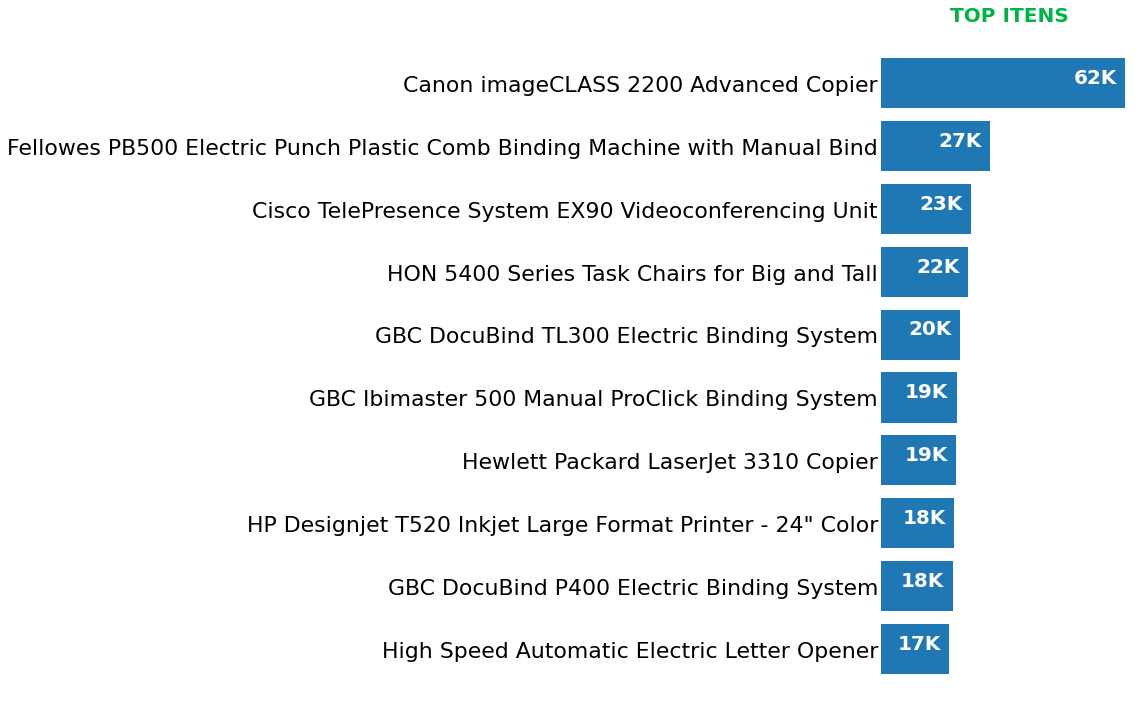

In [272]:
fig,ax = plt.subplots(
            figsize = (16,10)
        )

ax.barh(top_n_itens['Product Name'].values, # Definindo valor do eixo X, 
         top_n_itens['Sales'].values, # Definindo valor do eixo Y
         align='center'
        )

# Colocando rótulo de dados
for i in np.arange(0,n):
    ax.annotate('{:,.0f}K'.format(top_n_itens['Sales'].values[i]/1000), 
                (top_n_itens['Sales'].values[i],i), 
                ha="center", xytext=(-30,0), textcoords="offset points", 
                fontsize=20, fontweight='bold', color="white")

# Tirando os valores do eixo X
ax.xaxis.set_visible(False)

# Mudando tamanho da fonte do eixo Y
ax.tick_params(axis='y', labelsize=22)
    
# Colocando do maior pro menor
ax.invert_yaxis()

# tirando as bordas
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# tirando as linhas de grade
ax.grid(False)

ax.set_title("TOP ITENS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

# ajustando tamanho certo para exportar
plt.tight_layout()
plt.savefig('Top Itens', transparent=True)

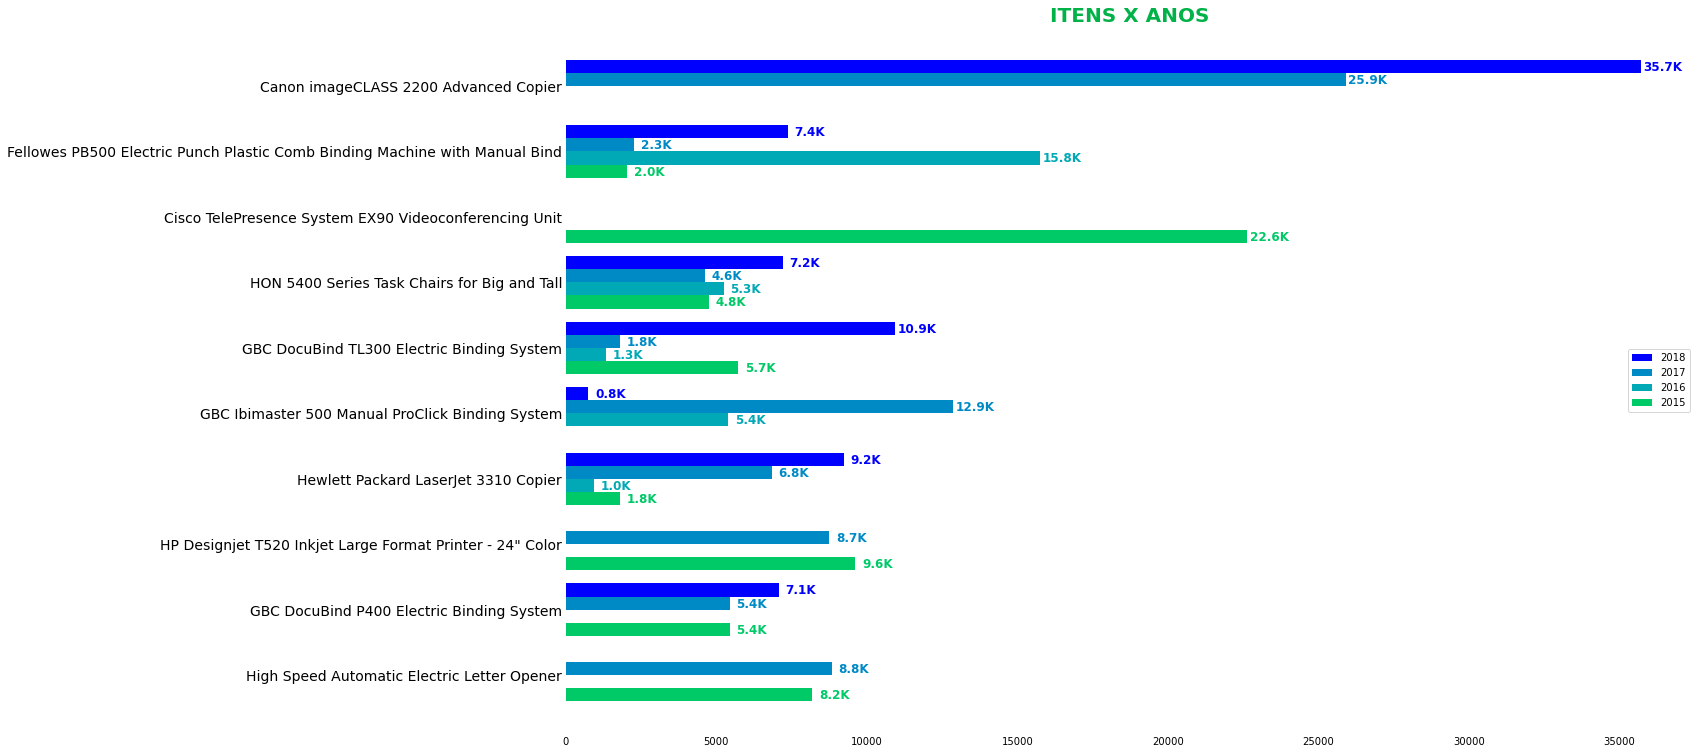

In [271]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig,ax = plt.subplots(
            figsize = (16,10)
        )

hg=0.2
qtde_itens=len(top_n_itens)

ax.barh(np.arange(0,qtde_itens)-hg/2-hg, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2018,
         color='blue'
        )
ax.barh(np.arange(0,qtde_itens)-hg/2, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2017,
         color='#008ac5'
        )
ax.barh(np.arange(0,qtde_itens)+hg/2, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2016,
         color='#00a9b5'
        )
ax.barh(np.arange(0,qtde_itens)+hg/2+hg, # Definindo valor do eixo X, 
         itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values, # Definindo valor do eixo Y
         align='center',
         height=hg, # Comprimento das barras
         label=2015,
         color='#00c968'
        )

# Colocando rótulo de dados
for i in np.arange(0,qtde_itens):
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values[i],i-hg/2-hg), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="blue")
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values[i],i-hg/2), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values[i],i+hg/2), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.1f}K'.format(itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values[i]/1000), 
                (itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values[i],i+hg/2+hg), 
                ha="center", xytext=(22,-4), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c968")

# Colocando do maior pro menor
ax.invert_yaxis()

# ajustando eixo y
ax.yaxis.set_ticks(np.arange(0,qtde_itens)) # Ajustando os valores de x
ax.set_yticklabels(top_n_itens['Product Name'])
ax.tick_params(axis='y',labelsize=14) # Melhorando o visual do eixo x

# tirando as bordas
ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# tirando as linhas de grade
ax.grid(False)

# colocando a legenda
ax.legend()

ax.set_title("ITENS X ANOS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

# mandando plotar
plt.savefig('Itens por Ano', transparent=True)

### EXTRA: E se quisermos outros tipos de gráficos?